In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import List
import os

os.getcwd()

'/Users/dominikabober/Documents/GitHub/coding_exercises/python/part2/solutions/dbober'

1. Read data from given csv files, merge it by the “time” column, create a datetime index with the column “time”.

In [2]:
# good merging way when there's many files
data = pd.DataFrame({"time": []})
for channel in ["a", "b", "c"]:
    temp = pd.read_csv(f"../../data/data_{channel}.csv", parse_dates=["time"])
    data = pd.merge(data, temp, on="time", how="outer")

data.sort_values("time", inplace=True)
data.set_index(pd.DatetimeIndex(data["time"]), inplace=True)
data.drop(["time"], axis=1, inplace=True)
channels = data.columns
data

,channel_a,channel_b,channel_c
time,,,
2023-02-09 12:35:00,NaN,148.800003,NaN
2023-02-13 10:30:00,NaN,138.429993,NaN
2023-02-13 10:35:00,NaN,137.820007,NaN
2023-02-13 10:40:00,NaN,136.589996,NaN
2023-02-14 07:55:00,NaN,NaN,NaN
...,...,...,...
2023-11-20 04:15:00,NaN,217.210007,NaN
2023-11-20 04:20:00,NaN,225.830002,NaN
2023-11-20 04:25:00,NaN,229.000000,NaN


2. Check basic information about the data (e.g. type, size, missing values)

In [3]:
print(data.info())

summary_table = pd.DataFrame({"mean": [], "median": [], "std": []})
for channel in channels: #using the «channel» dataframe
    summary_table.loc[channel,] = [data[channel].mean(), data[channel].median(), data[channel].std()]
summary_table

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80295 entries, 2023-02-09 12:35:00 to 2023-11-20 04:35:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   channel_a  78505 non-null  float64
 1   channel_b  80265 non-null  float64
 2   channel_c  75561 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB
None


,mean,median,std
channel_a,179.408043,182.199997,30.439674
channel_b,358.319335,364.950012,63.111887
channel_c,191.336273,196.360001,29.145251


3. Suggest a few ways to get rid of missing values (e.g., delete, replace with another value). 

In [4]:
# deleting 
cleaned_data = data.copy()
cleaned_data.dropna(inplace=True)
cleaned_data

,channel_a,channel_b,channel_c
time,,,
2023-03-01 15:05:00,156.779999,328.070007,303.329987
2023-03-01 15:15:00,158.429993,329.019989,195.830002
2023-03-01 15:20:00,158.710007,326.600006,197.289993
2023-03-01 15:25:00,159.100006,326.529999,199.309998
2023-03-01 15:30:00,159.449997,328.980011,194.490005
...,...,...,...
2023-11-15 06:40:00,176.919998,269.459991,192.160004
2023-11-15 06:45:00,179.350006,282.690002,195.490005
2023-11-15 06:50:00,182.570007,286.769989,197.190002


In [5]:
# filling with mean 
filled_with_mean_data = data.copy()
for channel in channels:  #using the «channels» dataframe
    filled_with_mean_data[channel].fillna(filled_with_mean_data[channel].mean(), inplace=True)
filled_with_mean_data

,channel_a,channel_b,channel_c
time,,,
2023-02-09 12:35:00,179.408043,148.800003,191.336273
2023-02-13 10:30:00,179.408043,138.429993,191.336273
2023-02-13 10:35:00,179.408043,137.820007,191.336273
2023-02-13 10:40:00,179.408043,136.589996,191.336273
2023-02-14 07:55:00,179.408043,358.319335,191.336273
...,...,...,...
2023-11-20 04:15:00,179.408043,217.210007,191.336273
2023-11-20 04:20:00,179.408043,225.830002,191.336273
2023-11-20 04:25:00,179.408043,229.000000,191.336273


In [6]:
# interpolate
interpolated_data = data.copy()
interpolated_data.interpolate(inplace=True, limit_direction="both")
interpolated_data

#interpolation is a new concept to me

,channel_a,channel_b,channel_c
time,,,
2023-02-09 12:35:00,230.210007,148.800003,303.329987
2023-02-13 10:30:00,230.210007,138.429993,303.329987
2023-02-13 10:35:00,230.210007,137.820007,303.329987
2023-02-13 10:40:00,230.210007,136.589996,303.329987
2023-02-14 07:55:00,230.210007,128.555291,303.329987
...,...,...,...
2023-11-20 04:15:00,186.929993,217.210007,155.000000
2023-11-20 04:20:00,186.929993,225.830002,155.000000
2023-11-20 04:25:00,186.929993,229.000000,155.000000


4. Make plots for all channels in data.


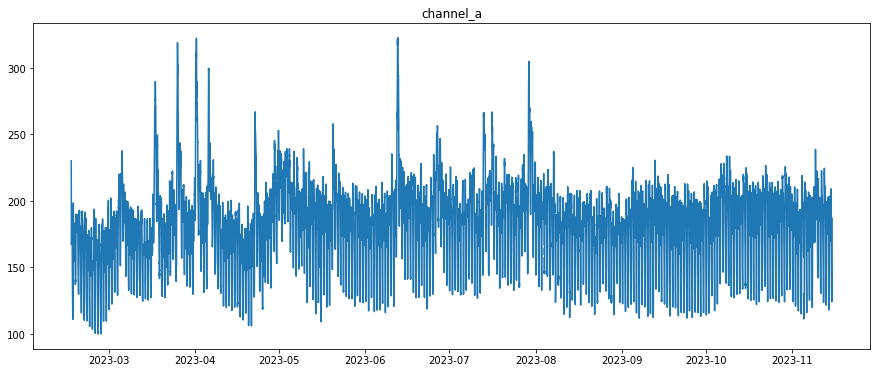

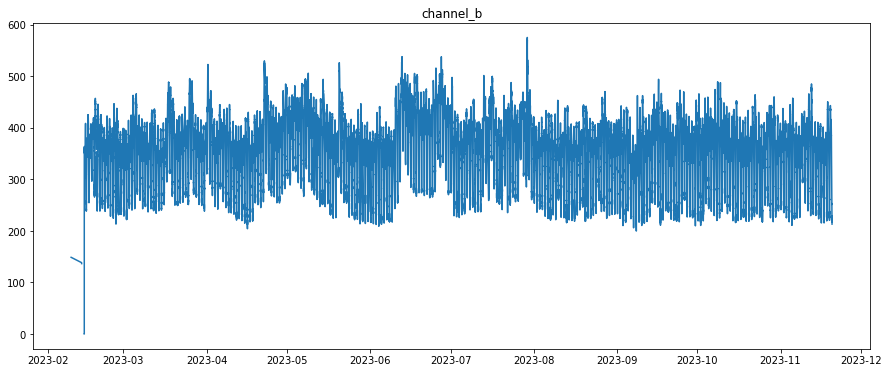

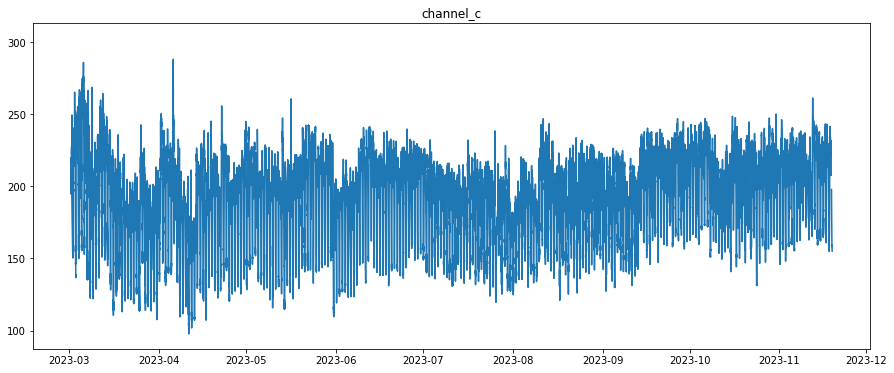

In [7]:
# with matplotlib.pyplot
for channel in channels: # using loop to plot all channels
    plt.figure(figsize=(15,6))
    plt.plot(data.index, data[channel])
    plt.title(channel)
    plt.show()

In [8]:
# with plotly on seperate plots
for channel in channels:
    fig = go.Figure(go.Scatter(x=data.index, y=data[channel]))
    fig.update_layout(title=channel)
    fig.write_html(f"plots/{channel}.html")

In [9]:
# with plotly on one plot
fig = make_subplots(rows=len(data.columns), cols=1, shared_xaxes=True)
for i, channel in enumerate(channels):
    fig.add_trace(go.Scatter(x=data.index, y=data[channel], name=channel), row=i+1, col=1)
fig.update_layout(title="data")
fig.write_html("plots/merged_data.html")

5. Print mean values for grouped data by the hour, month, year. Try other statistical functions.

In [25]:
data["hour"] = data.index.hour
data["month"] = data.index.month
data["year"] = data.index.year

groupedby_columns = ["hour", "month", "year"]

for grouped_by in groupedby_columns:

    grouped_data = data.groupby(grouped_by)[channels]
    print("grouped by ", grouped_by)
    print("mean\n-------\n", grouped_data.mean(),
        "median\n-------\n", grouped_data.median(),
        "std\n-------\n", grouped_data.std())


grouped by  hour
mean
-------
        channel_a   channel_b   channel_c
hour                                    
0     166.238602  359.966178  184.543001
1     151.610506  324.140851  167.589180
2     141.311391  293.797605  154.794091
3     135.797488  271.547336  148.549785
4     134.937784  258.991561  146.265326
5     141.903999  256.438909  148.318541
6     160.953971  273.103870  158.131807
7     183.511881  306.137030  177.142828
8     192.455175  346.860561  196.858392
9     191.897898  377.037103  204.248400
10    191.811446  385.088736  206.413330
11    191.941153  392.543035  207.600859
12    191.370398  397.960251  208.549831
13    189.918306  400.124096  208.056053
14    186.847181  396.409615  206.078441
15    185.780571  387.473973  203.813920
16    188.100950  380.381727  203.612570
17    192.417894  382.197653  206.544163
18    197.782769  387.746439  210.270006
19    202.269170  395.059722  212.350928
20    205.369624  403.934220  212.924984
21    203.671044  413.4020

6. Make plots for the mean values for grouped data by the hour, month, year (from previous point).


In [11]:
for channel in channels:
    fig = make_subplots(rows=len(groupedby_columns),
                        subplot_titles=[f"grouped by {i}" for i in groupedby_columns])
    for i, grouped_by in enumerate(groupedby_columns): # enumerate is a new function for me
        grouped_data = data.groupby(grouped_by).mean()
        fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data[channel], name=grouped_by), row=i+1, col=1)
    fig.update_layout(title=channel)
    fig.write_html(f"plots/{channel}_grouped.html")

7. Create additional column with {0,1} values. 1 if given value from “channel_a” is greater than 250, otherwise 0.

In [12]:
data["channel_a_flag"] = 0
data.loc[data[data["channel_a"]>250].index, "channel_a_flag"] = 1
data[data["channel_a_flag"]==1]

,channel_a,channel_b,channel_c,hour,month,year,channel_a_flag
time,,,,,,,
2023-03-17 10:25:00,250.490005,421.899994,185.779999,10,3,2023,1
2023-03-17 10:30:00,251.899994,419.100006,184.259995,10,3,2023,1
2023-03-17 10:35:00,252.460007,423.850006,184.789993,10,3,2023,1
2023-03-17 10:40:00,254.380005,425.959991,186.270004,10,3,2023,1
2023-03-17 10:45:00,255.259995,426.390015,187.830002,10,3,2023,1
...,...,...,...,...,...,...,...
2023-07-30 21:25:00,251.940002,416.399994,188.289993,21,7,2023,1
2023-07-30 21:30:00,252.059998,420.679993,186.690002,21,7,2023,1
2023-07-30 21:35:00,251.669998,417.089996,186.169998,21,7,2023,1


8. Make a plot for “channel_a” data with values greater than 250 marked with different colour. 


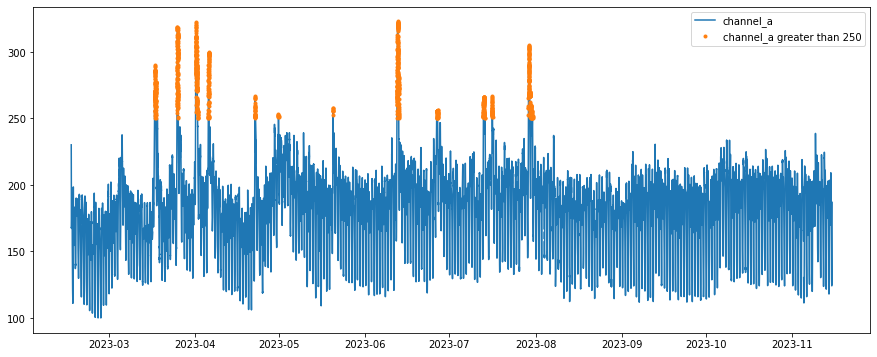

In [13]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data["channel_a"])
plt.plot(data[data["channel_a_flag"]==1].index, data[data["channel_a_flag"]==1]["channel_a"], ".")
plt.legend(["channel_a", "channel_a greater than 250"])
plt.show()

9. Write a function that returns data from the date range specified in the function parameters (start_date, end_date). 


In [14]:
def get_period_data(data: pd.DataFrame, start_date: pd.Timestamp, end_date: pd.Timestamp) -> pd.DataFrame: # what is ->
    temp = data.loc[start_date: end_date,]
    return temp

get_period_data(data, "2023-06-01", "2023-06-02")

,channel_a,channel_b,channel_c,hour,month,year,channel_a_flag
time,,,,,,,
2023-06-01 00:00:00,169.860001,359.230011,178.089996,0,6,2023,0
2023-06-01 00:05:00,168.649994,359.350006,176.559998,0,6,2023,0
2023-06-01 00:10:00,167.289993,356.070007,174.679993,0,6,2023,0
2023-06-01 00:15:00,166.119995,349.600006,171.830002,0,6,2023,0
2023-06-01 00:20:00,164.300003,348.609985,170.059998,0,6,2023,0
...,...,...,...,...,...,...,...
2023-06-02 23:35:00,174.000000,378.540009,183.789993,23,6,2023,0
2023-06-02 23:40:00,173.940002,379.850006,183.710007,23,6,2023,0
2023-06-02 23:45:00,173.800003,376.690002,182.339996,23,6,2023,0


10. Write a function that returns the indexes of the points from the given column in Data Frame that are greater than mean + 2 * std.


In [21]:
def get_data_greater_than(data: pd.DataFrame, column: str) -> pd.DatetimeIndex:
    return data[data[column] > (data[column].mean() + 2*data[column].std())].index

11. Make a plot with the marked points received from the function from the previous task. Add a line that marks the boundary for the marked points.


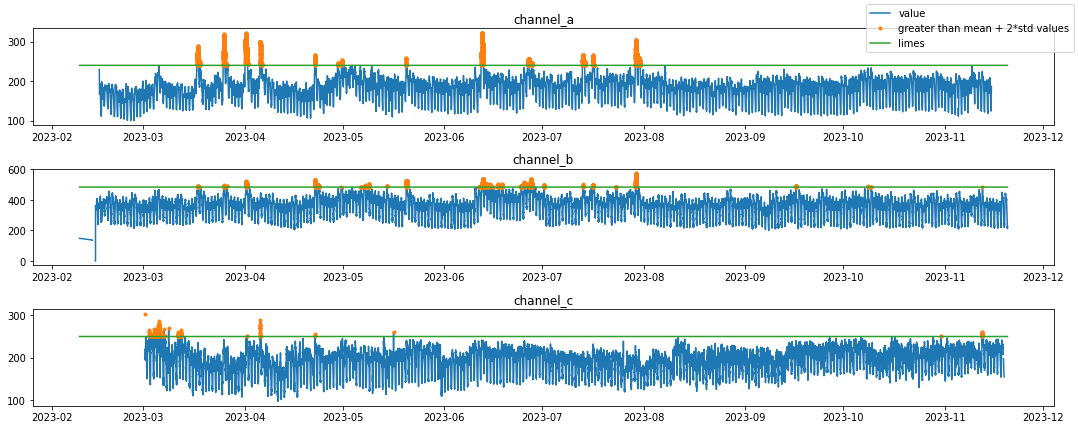

In [22]:
fig, axs = plt.subplots(len(channels), 1, figsize=(15,6))
for i, channel in enumerate(channels):
    data[f"{channel}_limes"] = data[channel].mean() + 2*data[channel].std()
    
    points = get_data_greater_than(data, channel)
    axs[i].plot(data.index, data[channel])
    axs[i].plot(points, data.loc[points, channel], ".")
    axs[i].plot(data.index, data[f"{channel}_limes"])
    axs[i].set_title(channel)
fig.legend(labels=["value", "greater than mean + 2*std values", "limes"])
fig.tight_layout()

12. Save the data from channel_a to csv. The data in csv should have a frequency of 1h (it is necessary to make aggregation. e.g. mean). The data should also not have a value greater than 250 (replace with an empty value).

In [27]:
channel_a_data = data[["hour", "channel_a"]].copy()
channel_a_data.dropna(inplace=True)

# 1. option with taking just first known value from every hour
option_1 = channel_a_data.asfreq("1h")[["channel_a"]]
option_1.loc[option_1[option_1["channel_a"]>250].index, "channel_a"] = None
option_1.to_csv("data/channel_a_data_option_1.csv")

# 2. option with taking mean value for every hour
channel_a_data["date"] = channel_a_data.index.date
channel_a_data = channel_a_data.groupby(["date", "hour"]).mean()[["channel_a"]]
channel_a_data["time"] = pd.to_datetime([pd.to_datetime(f"{date} {hour}:00") 
                                         for date, hour in channel_a_data.index])
channel_a_data.set_index(pd.DatetimeIndex(channel_a_data["time"]), inplace=True)
channel_a_data.drop(["time"], axis=1, inplace=True)
option_2 = channel_a_data.asfreq("1h")
option_2.loc[option_2[option_2["channel_a"]>250].index, "channel_a"] = None
option_2.to_csv("data/channel_a_data_option_2.csv")

option 2 gives us 1 more row than the first one

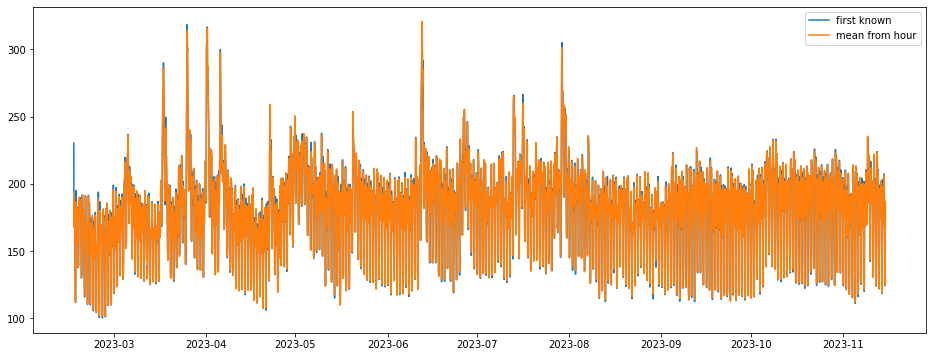

In [24]:
plt.figure(figsize=(16,6))
plt.plot(option_1.index, option_1["channel_a"])
plt.plot(option_2.index, option_2["channel_a"])
plt.legend(["first known", "mean from hour"])
plt.show()